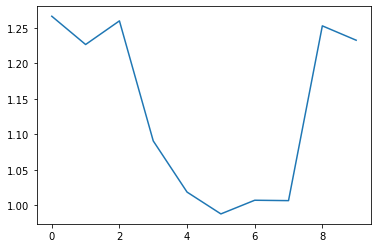

In [130]:
from qiskit import *
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from qiskit.quantum_info import random_statevector, Statevector
from qiskit import execute, Aer
from qiskit.visualization import *

n=1000                  #no of iterations or layers

random_vec=random_statevector(16).data
l_list=range(n)
mods=np.empty(n)

def odd_layer(circuit,theta):
    for qubit in range(4):
        circuit.rx(theta,qubit)
        
def even_layer(circuit,theta):
    for qubit in range(4):
        circuit.rx(theta,qubit)
    circuit.cz(0,1)
    circuit.cz(0,2)
    circuit.cz(0,3)
    circuit.cz(1,2)
    circuit.cz(1,3)
    circuit.cz(2,3)

initial_state=[1,0]           #initialize to zero

def f(theta):
    qc = QuantumCircuit(qr)
    for i in range(4):
        qc.initialize(initial_state,i)
    for i in range(l+1):
        odd_layer(qc,theta)
        even_layer(qc,theta)
    backend = Aer.get_backend('statevector_simulator')
    outputstate = execute(qc, backend).result().get_statevector()
    return(np.linalg.norm(outputstate-random_vec))
    
for l in l_list:
    result = optimize.minimize_scalar(f)
    #print(result.success) # check if solver was successful
    #print(l)
    mods[l]=f(result.x)




plt.plot(l_list,mods)



In [126]:

#backend = Aer.get_backend('statevector_simulator')
#outputstate = execute(qc, backend).result().get_statevector()
#print(outputstate)
#from qiskit_textbook.tools import array_to_latex
#array_to_latex(outputstate, pretext="\\text{State_vector} = ")

In [127]:
##unitary matrix
#backend = Aer.get_backend('unitary_simulator')
#unitary = execute(qc,backend).result().get_unitary()
#array_to_latex(unitary, pretext="\\text{Circuit = } ")

In [128]:
#qc.measure_all()
#backend = Aer.get_backend("qasm_simulator")
#job = execute(qc,backend=backend, shots =10000)
#counts = job.result().get_counts()
#plot_histogram(counts)